<h1> Data Preparation </h1> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from the specified CSV file path
df = pd.read_csv(r'C:\Users\VICTUS\Downloads\21039633_Anish Lamichhane\21039633_Anish lamichhane\Churn_Modelling.csv')




In [3]:
# Display the first few rows of the DataFrame to inspect the dataset structure
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Retrieve and display the column names of the DataFrame
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [5]:
# Display concise summary information about the DataFrame, including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Calculate and store the count of missing values for each column in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
# Drop the specified columns ("RowNumber", "CustomerId", "Surname") from the DataFrame along the columns (axis=1)
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

# Display the first few rows of the DataFrame after dropping the specified columns
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Extract the target variable 'y' from the DataFrame, selecting the 10th column using iloc
y = df.iloc[:, 10]

# Display the first few rows of the target variable 'y'
y.head()


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
# Extract the feature variables 'X' from the DataFrame, selecting columns 2 through 9 using iloc
X = df.iloc[:, 2:10]

# Display the first few rows of the feature variables 'X'
X.head()


,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Female,42,2,0.00,1,1,1,101348.88
1,Female,41,1,83807.86,1,0,1,112542.58
2,Female,42,8,159660.80,3,1,0,113931.57
3,Female,39,1,0.00,2,0,0,93826.63
4,Female,43,2,125510.82,1,1,1,79084.10


<h1>  Data Analysis</h1

Gender
Male      5457
Female    4543
Name: count, dtype: int64


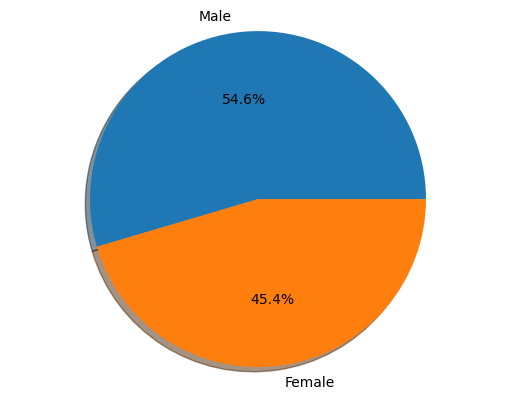

In [10]:
# Define labels for the 'Gender' categories
labels = ['Male', 'Female']

# Count the occurrences of each gender category in the 'Gender' column of feature variables 'X'
sizes = X['Gender'].value_counts()
print(sizes)

# Display a pie chart to visualize the distribution of genders
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


<Axes: xlabel='Geography', ylabel='Exited'>

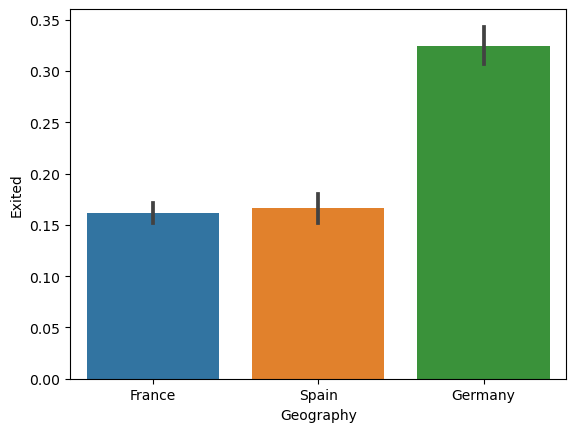

In [11]:
# Create a bar plot using Seaborn to visualize the relationship between 'Geography' and 'Exited'
sns.barplot(x='Geography', y='Exited', data=df)

<Axes: xlabel='Gender', ylabel='Exited'>

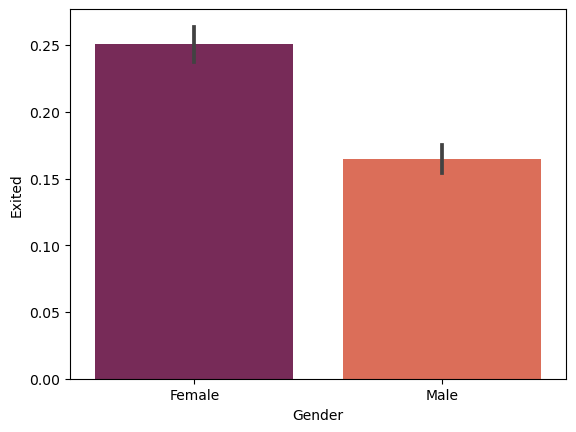

In [12]:

sns.barplot(x='Gender', y='Exited', data=df,palette='rocket')

Text(0.5, 1.0, 'Age Distribution')

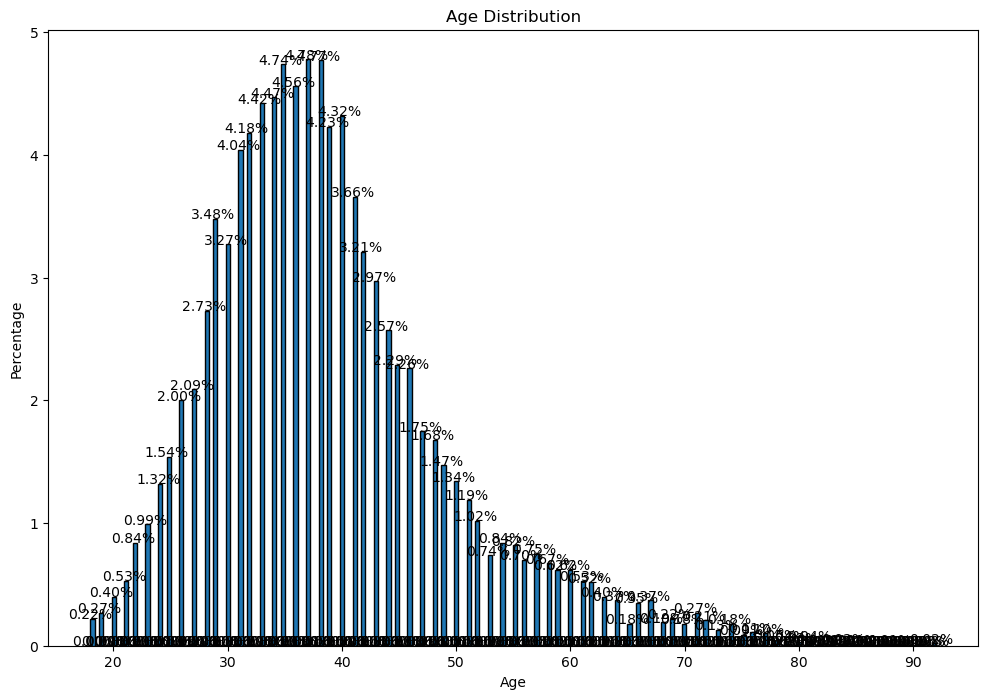

In [13]:
# Create histogram 
counts, bins = np.histogram(df['Age'], bins=200)

# Calculate percentages
totals = np.sum(counts)
percents = counts / totals * 100

# Plot bar chart
plt.figure(figsize=(12,8))
plt.bar(bins[:-1], percents, width=np.diff(bins), align='edge', edgecolor='black')

# Annotate percentages 
for x, y in zip(bins[:-1], percents):
    plt.text(x=x, y=y, s=f'{y:.2f}%', ha='center')

plt.xlabel('Age')  
plt.ylabel('Percentage')
plt.title('Age Distribution')

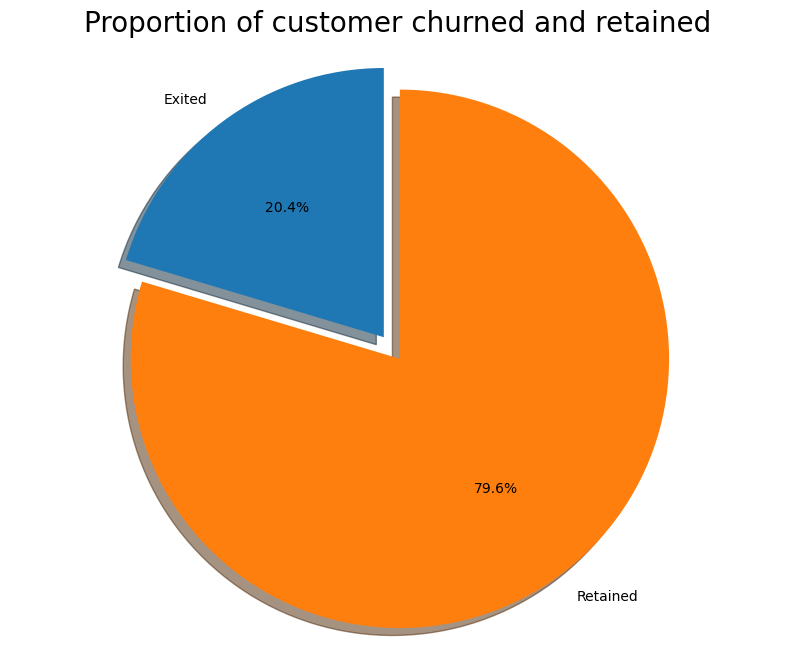

In [14]:
# Define labels and sizes for the pie chart representing the proportion of customers exited and retained
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

# Set explode to highlight the 'Retained' section
explode = (0, 0.1)

# Create a pie chart to visualize the proportion of customer churned and retained
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size=20)
plt.show()


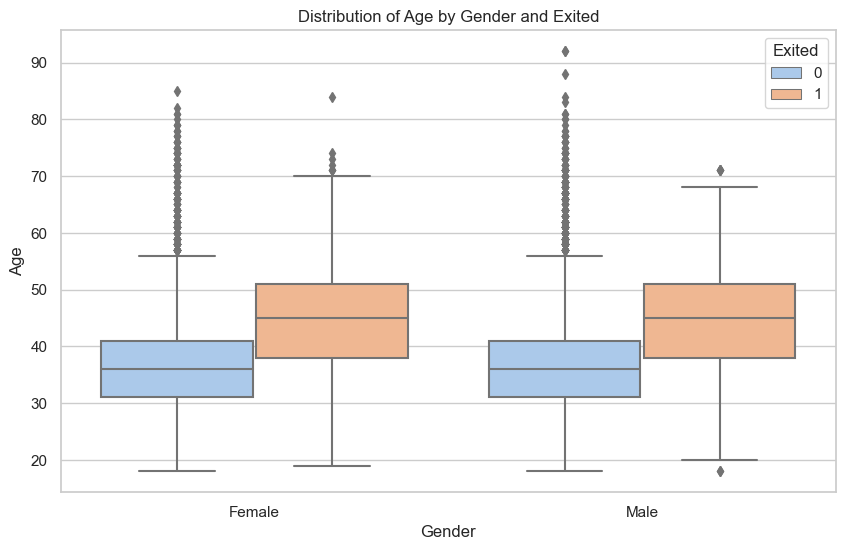

In [15]:

# Set the Seaborn style to 'whitegrid'
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a boxplot using Seaborn to visualize the distribution of Age by Gender and Exited status
sns.boxplot(x='Gender', y='Age', hue='Exited', data=df, palette='pastel')

# Set the title for the plot
plt.title('Distribution of Age by Gender and Exited')

# Show the plot
plt.show()


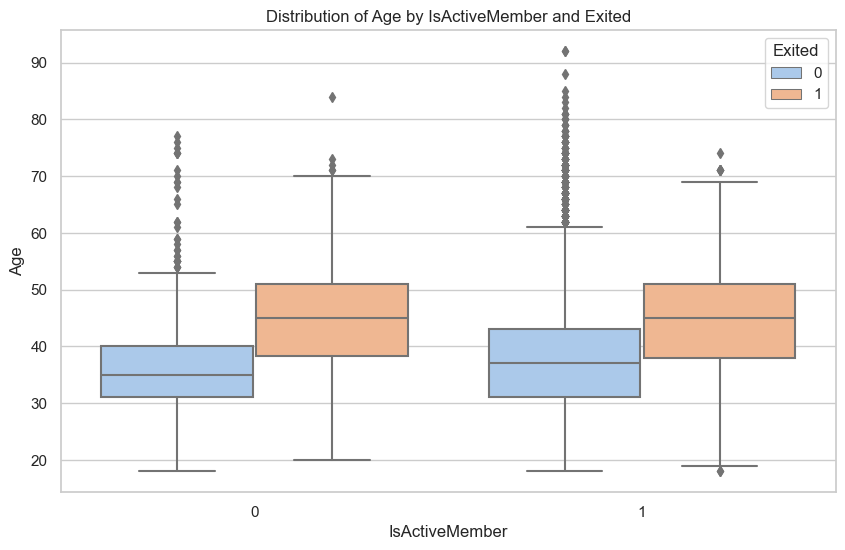

In [16]:
# Set the Seaborn style to 'whitegrid'
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a boxplot using Seaborn to visualize the distribution of Age by IsActiveMember and Exited status
sns.boxplot(x='IsActiveMember', y='Age', hue='Exited', data=df, palette='pastel')

# Set the title for the plot
plt.title('Distribution of Age by IsActiveMember and Exited')

# Show the plot
plt.show()


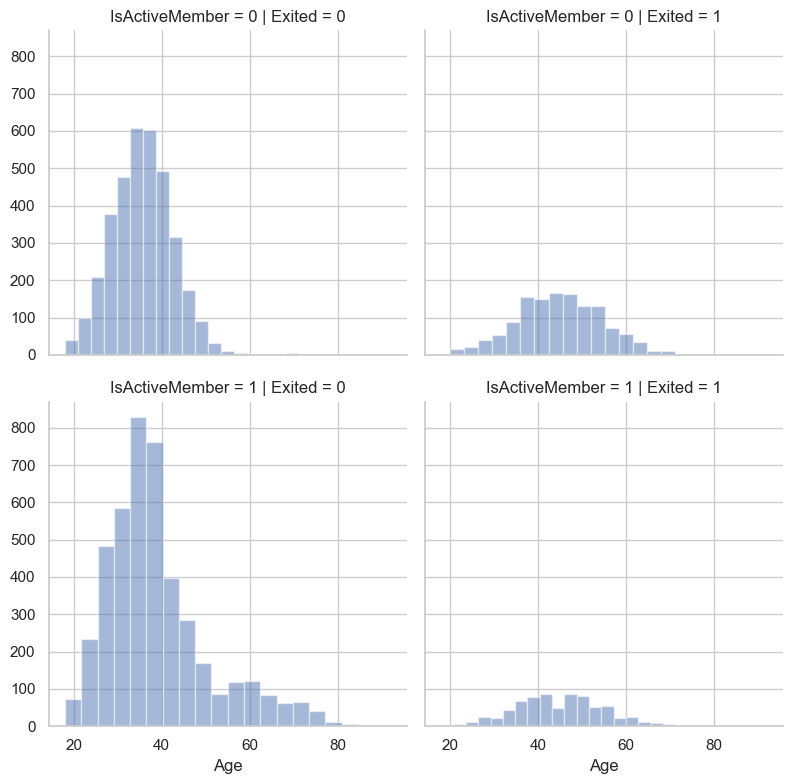

In [17]:
# Create a FacetGrid using Seaborn to display histograms of Age based on IsActiveMember and Exited categories
g = sns.FacetGrid(df, row='IsActiveMember', col='Exited', height=4)

# Map histograms to the grid with specified parameters
g.map(plt.hist, 'Age', alpha=0.5, bins=20)

# Add a legend to the grid
g.add_legend()

# Show the plot
plt.show()


In [18]:
# Import necessary libraries for label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Instantiate a LabelEncoder
label = LabelEncoder()

# Apply label encoding to the 'Gender' column in the feature variables 'X'
X['Gender'] = label.fit_transform(X['Gender'])

# Display the encoded values for the first 10 rows of the 'Gender' column
print(X['Gender'].head(10))


0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    1
Name: Gender, dtype: int32


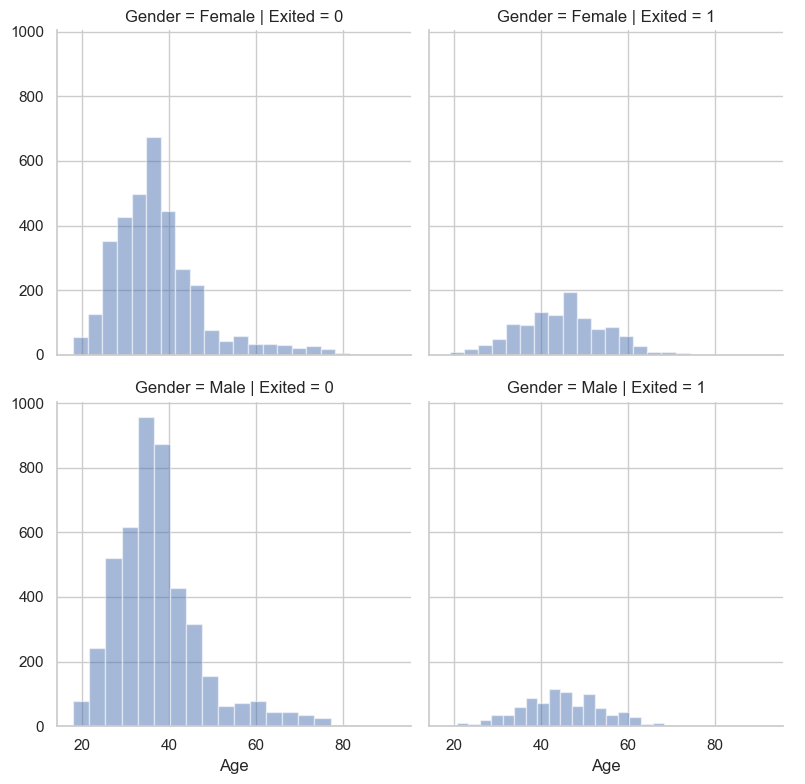

In [19]:
# Create a FacetGrid using Seaborn to display histograms of Age based on Gender and Exited categories
g = sns.FacetGrid(df, row='Gender', col='Exited', height=4)

# Map histograms to the grid with specified parameters
g.map(plt.hist, 'Age', alpha=0.5, bins=20)

# Add a legend to the grid
g.add_legend()

# Show the plot
plt.show()


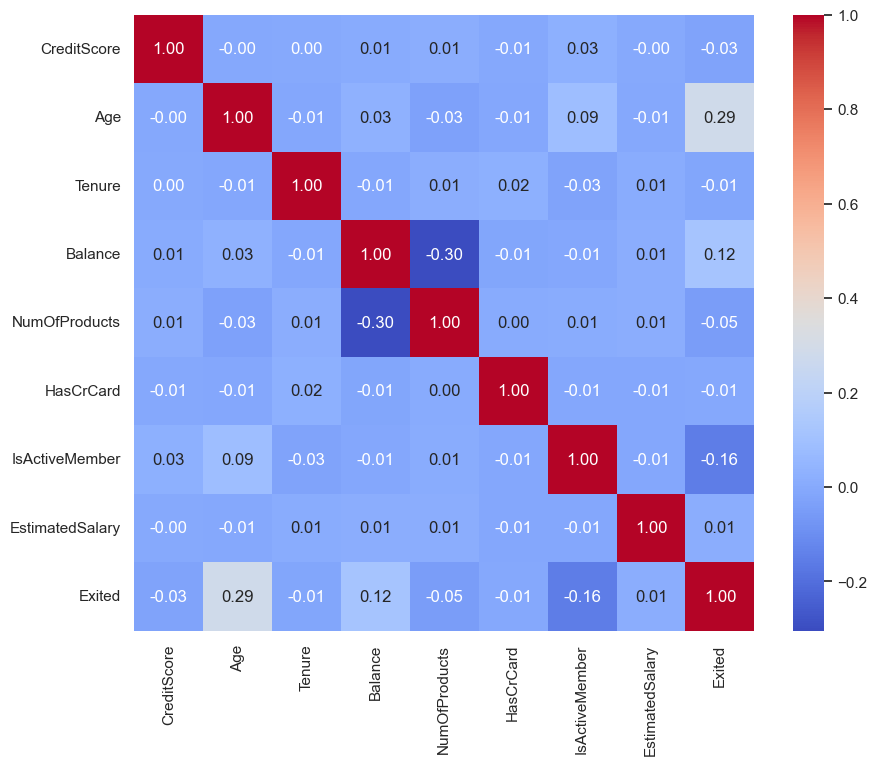

In [20]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a subset of the DataFrame with only numeric columns
numeric_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()



In [21]:
# Split the dataset into training and testing sets using random sampling
df_train = df.sample(frac=0.8, random_state=200)
df_test = df.drop(df_train.index)

# Display the lengths of the training and testing sets
print(len(df_train))
print(len(df_test))




8000
2000


(-1.0, 5.0)

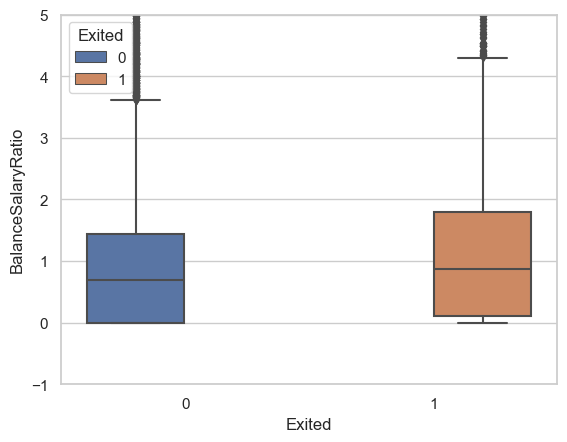

In [22]:
# Create a new feature 'BalanceSalaryRatio' in the training set
df_train['BalanceSalaryRatio'] = df_train['Balance'] / df_train['EstimatedSalary']

# Use Seaborn to create a boxplot for 'BalanceSalaryRatio' based on 'Exited' categories
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df_train)

# Set y-axis limits for better visualization
plt.ylim(-1, 5)


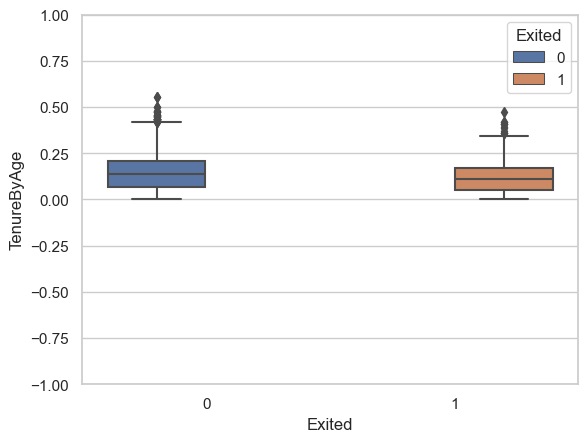

In [23]:
# Introduce a new variable 'TenureByAge' to standardize tenure over age in the training set
df_train['TenureByAge'] = df_train['Tenure'] / df_train['Age']

# Use Seaborn to create a boxplot for 'TenureByAge' based on 'Exited' categories
sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df_train)

# Set y-axis limits for better visualization
plt.ylim(-1, 1)
plt.show()


In [24]:
# Introduce a new variable 'CreditScoreGivenAge' to standardize credit score over age in the training set
df_train['CreditScoreGivenAge'] = df_train['CreditScore'] / df_train['Age']

# Display the first few rows of the updated DataFrame
df_train.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


<h1>  Data prep for model fitting </h1>

In [25]:
# Arrange columns by data type for easier manipulation in the training set
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge', 'CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

# Reorder columns in the training set DataFrame
df_train = df_train[['Exited'] + continuous_vars + cat_vars]

# Display the first few rows of the updated DataFrame
df_train.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [26]:
# Replace binary categorical variables 'HasCrCard' and 'IsActiveMember' with -1 for the corresponding 0 values in the training set
df_train.loc[df_train['HasCrCard'] == 0, 'HasCrCard'] = -1
df_train.loc[df_train['IsActiveMember'] == 0, 'IsActiveMember'] = -1

# Display the first few rows of the updated DataFrame
df_train.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [27]:
# Define lists for new categorical variables and those to be removed
new_list = ['Geography', 'Gender']
remove_list = []

# Create new binary categorical variables based on unique values in the specified columns
for i in new_list:
    if df_train[i].dtype == object:
        for j in df_train[i].unique():
            df_train[i + '_' + j] = np.where(df_train[i] == j, 1, -1)


In [28]:
# Compute min and max values for continuous variables in the training set
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()

# Normalize continuous variables in the training set
df_train[continuous_vars] = (df_train[continuous_vars] - minVec) / (maxVec - minVec)

# Display the first few rows of the updated DataFrame
df_train.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,Spain,Female,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,France,Female,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,France,Female,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,Germany,Male,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,France,Male,-1,1,-1,-1,1


In [29]:
# Constants
AGE_START_POINT = 16

def DfPrepPipeline(df_predict, df_train_Cols, minVec, maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict['Balance'] / df_predict['EstimatedSalary']
    df_predict['TenureByAge'] = df_predict['Tenure'] / (df_predict['Age'] - AGE_START_POINT)
    df_predict['CreditScoreGivenAge'] = df_predict['CreditScore'] / (df_predict['Age'] - AGE_START_POINT)

    # Reorder the columns
    continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
                       'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
    cat_vars = ['HasCrCard', 'IsActiveMember', "Geography", "Gender"]
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]

    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict['HasCrCard'] == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict['IsActiveMember'] == 0, 'IsActiveMember'] = -1

    # One hot encode the categorical variables
    categorical_columns = ["Geography", "Gender"]
    remove = []
    for column in categorical_columns:
        for category in df_predict[column].unique():
            category_str = str(category)  # Convert category to string
            df_predict[column + '_' + category_str] = np.where(df_predict[column] == category, 1, -1)
        remove.append(column)

    df_predict = df_predict.drop(remove, axis=1)

    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    missing_columns = [col for col in df_train_Cols if col not in df_predict.columns]

    for missing_column in missing_columns:
        df_predict[missing_column] = -1

    # MinMax scaling continuous variables based on min and max from the train data
    df_predict = df_predict.copy()  # Create a copy to avoid potential issues
    df_predict[continuous_vars] = (df_predict[continuous_vars] - minVec) / (maxVec - minVec)

    # Ensure that the variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]

    return df_predict




<h1> Model fitting and selection </h1>

In [30]:

# apply one-hot encoding
df_train_encoded = pd.get_dummies(df_train, columns=['Geography','Gender'], drop_first=True)


In [31]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X = df_train_encoded.loc[:, df_train_encoded.columns != 'Exited'] 
y = df_train_encoded.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_test to a NumPy array and ensure C-contiguity
X_test = np.ascontiguousarray(X_test)

# Train KNN model on the training set without specifying hyperparameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions and evaluate on the test set
test_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))


Accuracy: 0.809375
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1254
           1       0.62      0.31      0.41       346

    accuracy                           0.81      1600
   macro avg       0.73      0.63      0.65      1600
weighted avg       0.79      0.81      0.78      1600



In [32]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7], 
              'weights': ['uniform', 'distance'],
              'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Get best model 
knn = grid.best_estimator_

# Evaluate on test set
test_pred = knn.predict(X_test)
print('Tuned KNN Test Accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

Tuned KNN Test Accuracy: 0.8225
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1254
           1       0.69      0.33      0.44       346

    accuracy                           0.82      1600
   macro avg       0.76      0.64      0.67      1600
weighted avg       0.81      0.82      0.80      1600



In [33]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df_train_encoded.loc[:, df_train_encoded.columns != 'Exited'] 
y = df_train_encoded.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate DecisionTreeClassifier without specifying hyperparameters
dt_model = DecisionTreeClassifier()

# Fit the model using the training set
dt_model.fit(X_train, y_train)

# Make predictions and evaluate on the test set
test_pred = dt_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))



Accuracy: 0.788125
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1254
           1       0.51      0.54      0.52       346

    accuracy                           0.79      1600
   macro avg       0.69      0.70      0.69      1600
weighted avg       0.79      0.79      0.79      1600



In [34]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X = df_train_encoded.loc[:, df_train_encoded.columns != 'Exited'] 
y = df_train_encoded.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters for Decision Tree Classifier
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate GridSearchCV with DecisionTreeClassifier, using 5-fold cross-validation
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, refit=True, verbose=0)

# Fit the model using the training set
dt_grid.fit(X_train, y_train)

# Make predictions and evaluate on the test set
test_pred = dt_grid.predict(X_test)

print('Accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

# Display the best parameters found by the grid search
print("Best Hyperparameters:", dt_grid.best_params_)


Accuracy: 0.859375
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1254
           1       0.76      0.51      0.61       346

    accuracy                           0.86      1600
   macro avg       0.82      0.73      0.76      1600
weighted avg       0.85      0.86      0.85      1600

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data into train and test sets
X = df_train_encoded.loc[:, df_train_encoded.columns != 'Exited'] 
y = df_train_encoded.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate LogisticRegression without specifying hyperparameters
log_reg_model = LogisticRegression()

# Fit the model using the training set
log_reg_model.fit(X_train, y_train)

# Make predictions and evaluate on the test set
test_pred = log_reg_model.predict(X_test)

print("The report of Logistic Regression MODEL ")
print('Accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))





The report of Logistic Regression MODEL 
Accuracy: 0.80125
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1254
           1       0.62      0.21      0.32       346

    accuracy                           0.80      1600
   macro avg       0.72      0.59      0.60      1600
weighted avg       0.77      0.80      0.76      1600



In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Split data into train and test sets
X = df_train_encoded.loc[:, df_train_encoded.columns != 'Exited'] 
y = df_train_encoded.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 250, 500],  # Added more values for max_iter
    'multi_class': ['ovr', 'multinomial'],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Added solver parameter
}

# Instantiate GridSearchCV with LogisticRegression, using 5-fold cross-validation
log_reg_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, refit=True, verbose=0)

# Fit the model using the training set
log_reg_grid.fit(X_train, y_train)

# Make predictions and evaluate on the test set
test_pred = log_reg_grid.predict(X_test)

# Display the classification report of Logistic Regression model with hyperparameter tuning
print("The report of Logistic Regression MODEL with Hyperparameter Tuning")
print(classification_report(y_test, test_pred))

# Display the best parameters found by the grid search
print("Best Hyperparameters:", log_reg_grid.best_params_)



The report of Logistic Regression MODEL with Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1254
           1       0.63      0.23      0.33       346

    accuracy                           0.80      1600
   macro avg       0.72      0.60      0.61      1600
weighted avg       0.78      0.80      0.77      1600

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}


In [37]:

# Make the data transformation for test data
df_test = DfPrepPipeline(df_test, df_train.columns, minVec, maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()

# Add a new numeric column with random values between 2000 and 6000
df_test['RandomNumericColumn'] = np.random.uniform(196, 170, len(df_test))

# One-hot encode categorical variables in the test set
df_test_encoded = pd.get_dummies(df_test, columns=['Geography', 'Gender'], drop_first=True)

# Ensure columns order matches that of the training set
df_test_encoded = df_test_encoded[df_train_encoded.columns]

df_test_encoded.shape





(2000, 20)

In [38]:
print(classification_report(df_test_encoded['Exited'],log_reg_model.predict(df_test_encoded.loc[:, df_test_encoded.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1610
           1       0.71      0.12      0.20       390

    accuracy                           0.82      2000
   macro avg       0.76      0.55      0.55      2000
weighted avg       0.80      0.82      0.76      2000



AUC for Decision Tree Classifier: 0.937339004152669


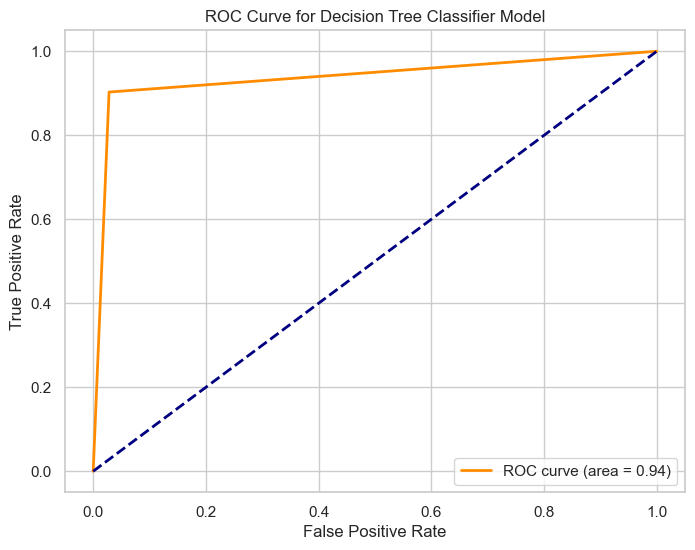

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probabilities for the positive class (class 1)
probs_dt = dt_model.predict_proba(df_train_encoded.loc[:, df_train_encoded.columns != 'Exited'])[:, 1]

# Calculate AUC
auc_dt = roc_auc_score(df_train_encoded.Exited, probs_dt)

print('AUC for Decision Tree Classifier:', auc_dt)

# Plot ROC curve
fpr_dt, tpr_dt, _ = roc_curve(df_train_encoded.Exited, probs_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier Model')
plt.legend(loc='lower right')
plt.show()



AUC for Logistic Regression Model: 0.7755503927933114


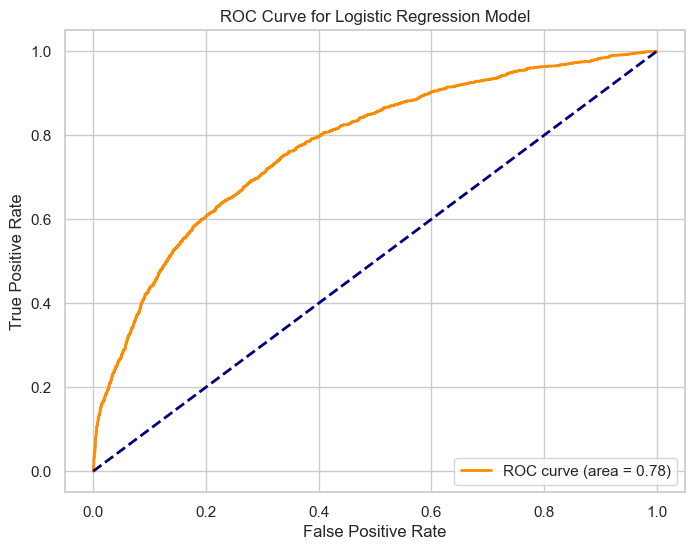

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probabilities for the positive class (class 1)
probs_logreg = log_reg_model.predict_proba(df_train_encoded.loc[:, df_train_encoded.columns != 'Exited'])[:, 1]

# Calculate AUC
auc_logreg = roc_auc_score(df_train_encoded.Exited, probs_logreg)

print('AUC for Logistic Regression Model:', auc_logreg)

# Plot ROC curve
fpr_logreg, tpr_logreg, _ = roc_curve(df_train_encoded.Exited, probs_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_logreg))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


AUC for KNN: 0.7825605461367554


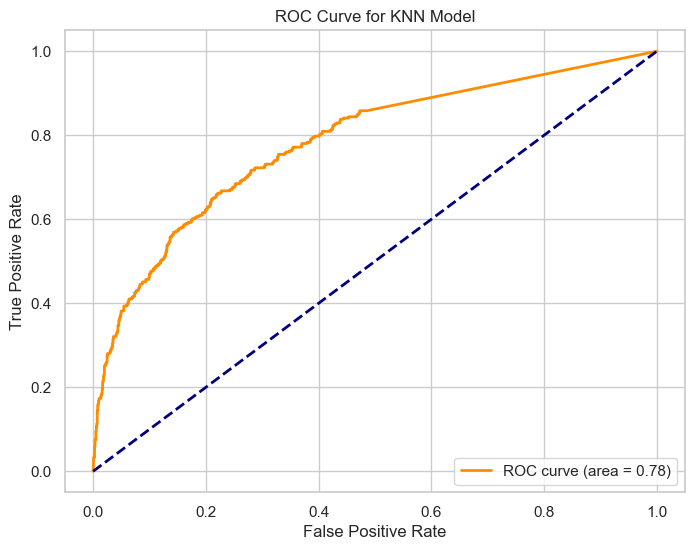

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probabilities for the positive class (class 1)
probs = knn.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_knn = roc_auc_score(y_test, probs)

print('AUC for KNN:', auc_knn)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc='lower right')
plt.show()


<h1>Conclusion </h1>


<h2>In summary, the evaluation of three different classification models on the provided dataset revealed that the Decision Tree Classifier outperformed both Logistic Regression and K-Nearest Neighbors (KNN) in terms of both AUC and test accuracy. The Decision Tree Classifier achieved the highest AUC of 0.94, indicating superior discrimination between the positive and negative classes. Additionally, it exhibited the highest test accuracy of 0.86 after hypertuning, further emphasizing its effectiveness in making accurate predictions on the test set. These results collectively suggest that the Decision Tree Classifier is the most promising model for the given classification task </h2>